References:
1. https://scikit-image.org/docs/dev/api/skimage.filters.html
2. https://stackoverflow.com/questions/41118808/difference-between-contrast-stretching-and-histogram-equalization
3. Digital Image Processing - Gonzalez et al.
4. https://homepages.inf.ed.ac.uk/rbf/HIPR2/median.htm
5. https://stackoverflow.com/questions/20638912/should-i-choose-mean-or-median-filter-for-gaussian-noise
6. https://www.markschulze.net/java/meanmed.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import io

from skimage import color
from skimage import exposure
from skimage import filters
from skimage import io
from skimage import morphology
from skimage import util

### **1. [40] Diberikan citra “flower.jpg” yang berukuran 563 x 1000.**

a. [5] Tampilkan histogram citra tersebut dengan range intensitas 0 - 255

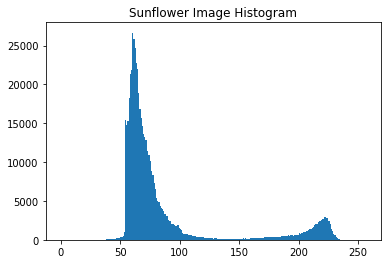

In [2]:
img_sunflower = io.imread("Citra Tugas Lab 1/sunflower.jpg")

img_sunflower = util.img_as_ubyte(img_sunflower)
plt.hist(img_sunflower.flatten(), 256, range=(0,256))
plt.title('Sunflower Image Histogram')
plt.show()

b. [10] Lakukan histogram equalization terhadap citra tersebut kemudian tampilkan histogramnya

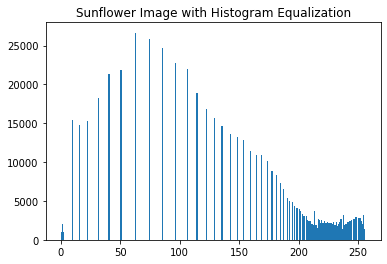

In [3]:
eq_img_sunflower = exposure.equalize_hist(img_sunflower)

eq_img_sunflower = util.img_as_ubyte(eq_img_sunflower)
plt.hist(eq_img_sunflower.flatten(), 256, range=(0,256))
plt.title('Sunflower Image with Histogram Equalization')
plt.show()

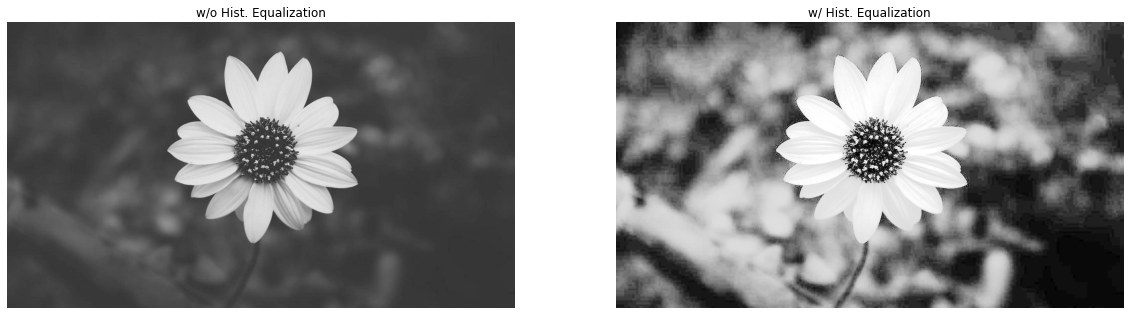

In [4]:
plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(img_sunflower, cmap="gray", vmin=0, vmax=255)
plt.title('w/o Hist. Equalization')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(eq_img_sunflower, cmap="gray", vmin=0, vmax=255)
plt.title('w/ Hist. Equalization')
plt.axis("off")

plt.show()

c. [10] Lakukan contrast stretching terhadap citra asli kemudian tampilkan histogramnya

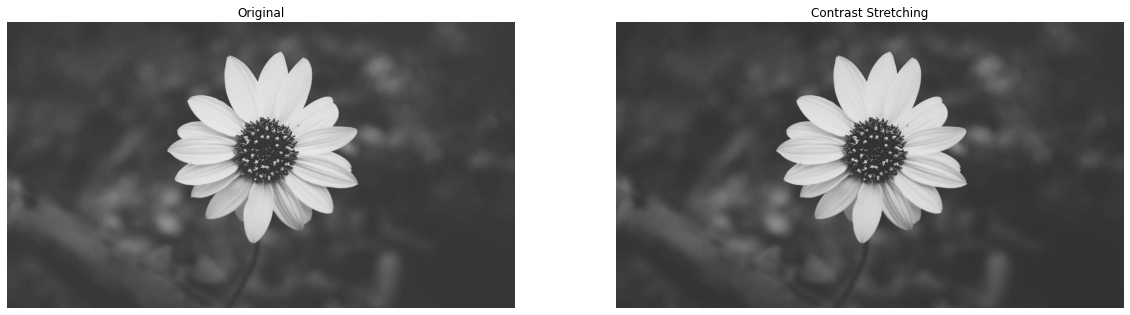

In [5]:
mn = min(img_sunflower.flatten())
mx = max(img_sunflower.flatten())
b = int(np.floor(255 / (mx - mn)))

cs_img_sunflower = (img_sunflower - mn) * b

plt.figure(figsize=(20,20))

plt.subplot(1, 2, 1)
plt.imshow(img_sunflower, cmap="gray", vmin=0, vmax=255)
plt.title('Original')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cs_img_sunflower, cmap="gray", vmin=0, vmax=255)
plt.title('Contrast Stretching')
plt.axis("off")

plt.show()

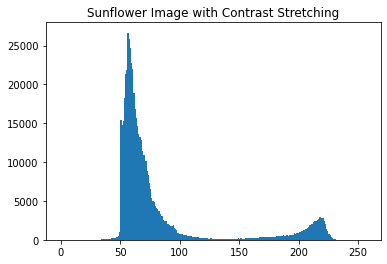

In [6]:
plt.hist(cs_img_sunflower.flatten(), 256, range=(0,256))
plt.title('Sunflower Image with Contrast Stretching')
plt.show()

d. [15] Coba ceritakan perbedaan apa yang dapat anda temukan antara metode histogram equalization
dan contrast stretching.

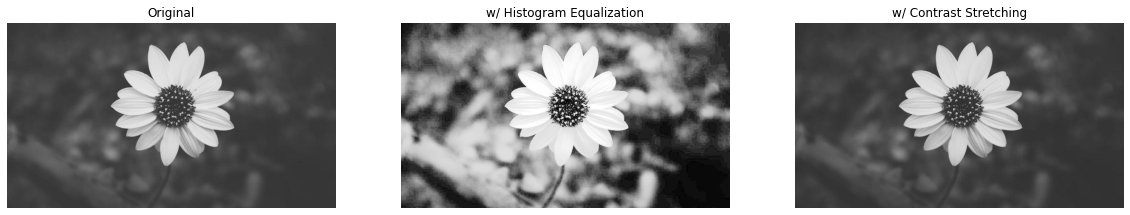

In [7]:
plt.figure(figsize=(20,20))

plt.subplot(1, 3, 1)
plt.imshow(img_sunflower, cmap="gray", vmin=0, vmax=255)
plt.title('Original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(eq_img_sunflower, cmap="gray", vmin=0, vmax=255)
plt.title('w/ Histogram Equalization')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cs_img_sunflower, cmap="gray", vmin=0, vmax=255)
plt.title('w/ Contrast Stretching')
plt.axis("off")

plt.show()

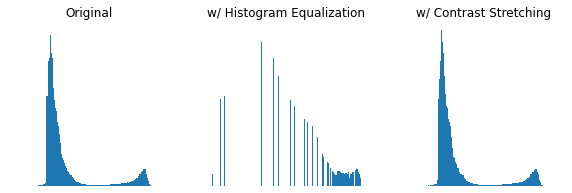

In [8]:
plt.figure(figsize=(10,3))

plt.subplot(1, 3, 1)
plt.hist(img_sunflower.flatten(), 256, range=(0,256))
plt.title('Original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.hist(eq_img_sunflower.flatten(), 256, range=(0,256))
plt.title('w/ Histogram Equalization')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.hist(cs_img_sunflower.flatten(), 256, range=(0,256))
plt.title('w/ Contrast Stretching')
plt.axis("off")

plt.show()

**Histogram Processing - Histogram Equalization**
1. Histogram processing: mengubah bentuk histogram agar pemetaan gray level pada citra juga berubah
2. Histogram equalization: mengubah pemetaan greylevel agar kontrasnya lebih menyebar pada kisaran 0-255
3. Uses probability to make the distribution better-spread

**Contrast Stretching**
1. Contrast stretching is a process that expands the range of intensity levels in an image so that it spans the full intensity range of the recording medium or display device (Gonzalez et al., 2008)
2. Contrast stretching mengembangkan range level intensitas pixel yang tadinya terbatas sehingga memiliki range intensitas penuh
3. Maps the existing intensity onto the not-so-dense area of the contrast range

**Berdasarkan percobaan yang dilakukan pada butir a–c di atas, didapatkan beberapa penemuan sebagai berikut:**
1. Didapati bahwa citra yang diproses melalui pendekatan histogram equalization terlihat memiliki detail yang lebih jelas (khususnya pada area yang sebelumnya gelap) dibanding citra yang diproses melalui pendekatan contrast stretching
2. Meskipun citra yang diproses melalui pendekatan histogram equalization memiliki detail lebih jelas, akan tetapi terdapat beberapa drawback yang terlihat pula, seperti kualitas gambar yang menjadi lebih 'kasar', kurang tajam, atau mungkin bisa dibilang pula lebih noisy (?)
3. Sesuai dengan nama dan tujuannya pula, histogram pada citra yang diproses melalui pendekatan histogram equalization memiliki distribusi yang lebih merata di bagian gelap dan terangnya
4. Sedangkan, citra yang diproses melalui pendekatan contrast stretching tidak terlalu berubah banyak, baik dari segi citra maupun bentuk histogram
5. Kendati tujuan kedua pendekatan sama—yakni sama-sama berusaha untuk melebarkan range distribusi warna, tetapi nyatanya pada kasus ini penggunaan contrast stretching dinilai tidak terlalu efektif untuk menjangkau detail dari citra low-contrast dibanding pendekatan histogram equalization

### **2. [30] Diberikan citra “iris.jpg” berukuran 254 x 199.**

a. [10] Gunakan Sobel spatial filter dan Prewitt spatial filter untuk menemukan dan menampilkan horizontal
edge dari citra tersebut

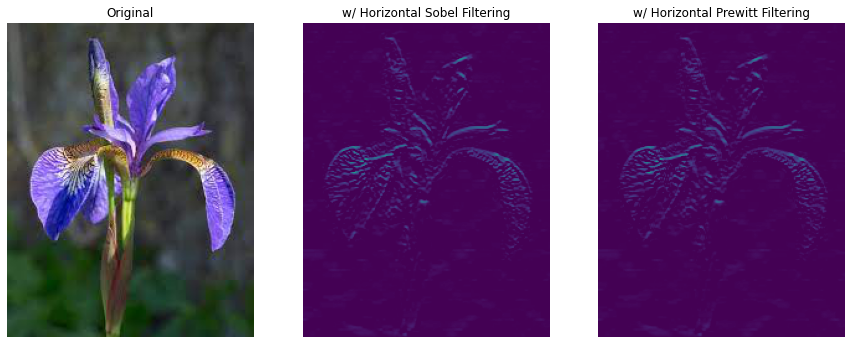

In [9]:
img_butterfly = io.imread('Citra Tugas Lab 1/iris.jpg')

gray = color.rgb2gray(img_butterfly)

img_butterfly_sh = util.img_as_ubyte(filters.sobel_h(gray))
img_butterfly_ph = util.img_as_ubyte(filters.prewitt_h(gray))

plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.imshow(img_butterfly, vmin=0, vmax=255)
plt.title('Original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_butterfly_sh, vmin=0, vmax=255)
plt.title('w/ Horizontal Sobel Filtering')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_butterfly_ph, vmin=0, vmax=255)
plt.title('w/ Horizontal Prewitt Filtering')
plt.axis("off")

plt.show()

b. [10] Gunakan Sobel spatial filter dan Prewitt spatial filter untuk menemukan dan menampilkan vertical
edge dari citra tersebut

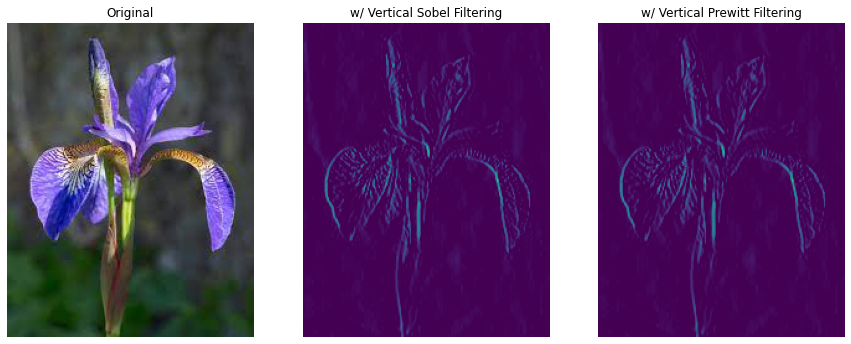

In [10]:
img_butterfly_sv = util.img_as_ubyte(filters.sobel_v(gray))
img_butterfly_pv = util.img_as_ubyte(filters.prewitt_v(gray))

plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.imshow(img_butterfly, vmin=0, vmax=255)
plt.title('Original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_butterfly_sv, vmin=0, vmax=255)
plt.title('w/ Vertical Sobel Filtering')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_butterfly_pv, vmin=0, vmax=255)
plt.title('w/ Vertical Prewitt Filtering')
plt.axis("off")

plt.show()

c. [10] Berdasarkan hasil 2a. dan 2b. temukan dan tampilkan edge keseluruhan dari citra tersebut

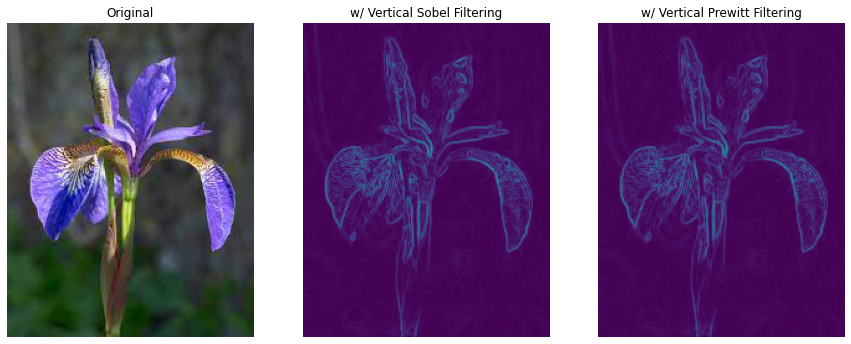

In [11]:
img_butterfly_s = util.img_as_ubyte(filters.sobel(gray))
img_butterfly_p = util.img_as_ubyte(filters.prewitt(gray))

plt.figure(figsize=(15,15))

plt.subplot(1, 3, 1)
plt.imshow(img_butterfly, vmin=0, vmax=255)
plt.title('Original')
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(img_butterfly_s, vmin=0, vmax=255)
plt.title('w/ Vertical Sobel Filtering')
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(img_butterfly_p, vmin=0, vmax=255)
plt.title('w/ Vertical Prewitt Filtering')
plt.axis("off")

plt.show()

Saya kurang paham dengan keterangan 'Tampilkan edge keseluruhan dari cita berikut', jadi saya berasumsi bahwa menampilkan edge keseluruhan bermakna menampilkan edge dengan pendekatan filtering secara vertikal dan horizontal.

### **3. [30] Diberikan gambar “starfish.png” berukuran 256 x 384 sebagai berikut:**

a. [7.5] Terapkan median filter pada citra tersebut dengan ukuran kernel 9x9

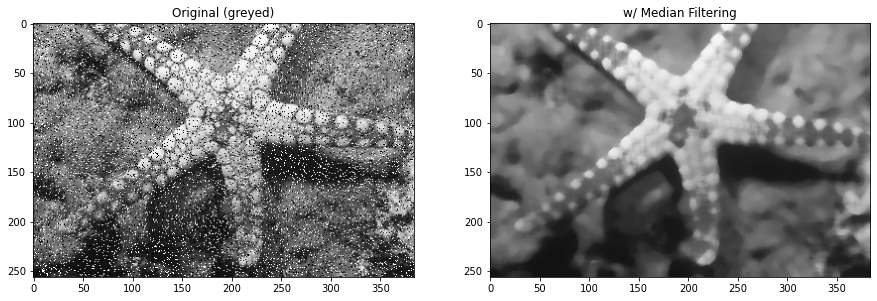

In [12]:
img_starfish = io.imread('Citra Tugas Lab 1/starfish.png')

fi_md_img_starfish = filters.rank.median(img_starfish, selem=morphology.square(9))

plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(img_starfish, cmap="gray", vmin=0, vmax=255)
plt.title('Original (greyed)')

plt.subplot(1, 2, 2)
plt.imshow(fi_md_img_starfish, cmap="gray", vmin=0, vmax=255)
plt.title('w/ Median Filtering')

plt.show()

b. [7.5] Terapkan mean filter pada citra tersebut dengan ukuran kernel 9x9

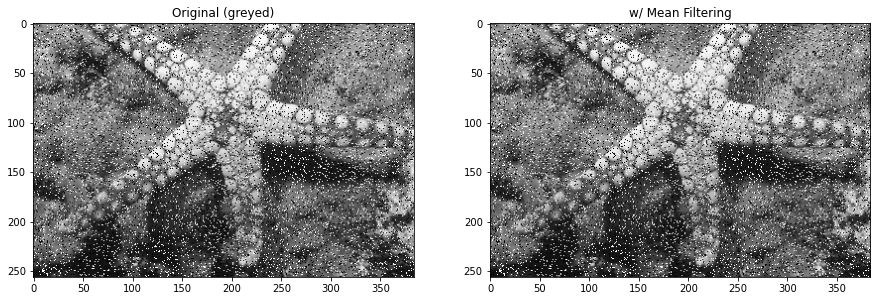

In [15]:
fi_avg_img_starfish = filters.rank.mean(img_starfish, selem=morphology.square(9))

plt.figure(figsize=(15,15))

plt.subplot(1, 2, 1)
plt.imshow(img_starfish, cmap="gray", vmin=0, vmax=255)
plt.title('Original (greyed)')

plt.subplot(1, 2, 2)
plt.imshow(fi_avg_img_starfish, cmap="gray", vmin=0, vmax=255)
plt.title('w/ Mean Filtering')

plt.show()

c. [15] Ceritakan perbedaan citra yang dihasilkan pada soal 3a. dan 3b. Filter manakah yang hasilnya lebih
baik menurut Anda? Berikan pula alasannya.

**Spatial Filtering in General**
Spatial filtering is the method of choice in situations when only additive random noise is present (Gonzalez et al., 2008)

**Median Filtering**
1. The best-known order-statistic filter is the median filter, which, as its name implies, replaces the value of a pixel by the median of the intensity levels in the neighborhood of that pixel (Gonzalez et al., 2008)
2. Median filters are particularly effective in the presence of both bipolar and unipolar impulse noise (Gonzalez et al., 2008)
3. The median is a more robust average than the mean and so a single very unrepresentative pixel in a neighborhood will not affect the median value significantly.
4. Since the median value must actually be the value of one of the pixels in the neighborhood, the median filter does not create new unrealistic pixel values when the filter straddles an edge. For this reason the median filter is much better at preserving sharp edges than the mean filter.

**Mean Filtering**
1. The mean filter is a simple sliding-window spatial filter that replaces the center value in the window with the average (mean) of all the pixel values in the window. The window, or kernel, is usually square but can be any shape.

**Berdasarkan percobaan pada butir a dan b, didapatkan beberapa penemuan sebagai berikut:**
1. Terlihat jelas bahwa hasil citra yang diolah melalui pendekatan median filtering lebih jelas dan lebih smooth dibanding citra yang diolah melalui pendekatan mean filtering
2. Pada tipe noise salt-n-pepper sebagaimana pada citra asli, filter yang paling tepat adalah median filter berdasarkan banyak penelitian dan sumber
3. Hal ini dikarenakan median filter mengubah value tengah dengan salah satu value pixel di sekitarnya berdasarkan kernel yang digunakan—dalam kasus ini, digunakan kernel 9x9—dan tidak membuat/mengakumulasi pixel baru yang berpotensi tidak realistik seperti mean filtering
4. Penemuan lain yang saya temui, semakin kecil dimensi kernelnya, terjadi peningkatan kualitas yang relatif lebih signifikan (at-least pada kasus ini) pada citra yang menggunakan pendekatan median filtering